## Marketing Project
### RECHEL REBELLO - 0787548

#### Using Random Forest Classifier, trying to predict whether a particular product will go on sale or not

### Initial setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import category_encoders as ce
from rfpimp import *
import seaborn as sns

C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df_raw = pd.read_csv("DatafinitiElectronicsProductsPricingData.csv")
df = df_raw.copy()
df.head().T

,0,1,2,3,4
id,AVphzgbJLJeJML43fA0o,AVpgMuGwLJeJML43KY_c,AVpgMuGwLJeJML43KY_c,AVpgMuGwLJeJML43KY_c,AVpgMuGwLJeJML43KY_c
prices.amountMax,104.99,69,69,69.99,66.99
prices.amountMin,104.99,64.99,69,69.99,66.99
prices.availability,Yes,In Stock,In Stock,Yes,Yes
prices.condition,New,New,New,New,New
prices.currency,USD,USD,USD,USD,USD
prices.dateSeen,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",2017-12-14T06:00:00Z,2017-09-08T05:00:00Z,2017-10-10T05:00:00Z,2017-08-28T07:00:00Z
prices.isSale,False,True,False,False,False
prices.merchant,Bestbuy.com,Walmart.com,Walmart.com,Bestbuy.com,Bestbuy.com
prices.shipping,NaN,Expedited,Expedited,NaN,NaN


In [3]:
df.shape

(14592, 31)

### Data exploration

In [4]:
def data_info(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [5]:
data_info(df)

,data type,percent missing,No. unique,unique values
prices.isSale,bool,0.000000,2,"[False, True]"
prices.amountMax,float64,0.000000,4697,"[104.99, 69.0, 69.99, 66.99, 66.0, 74.99, 65.9..."
prices.amountMin,float64,0.000000,4907,"[104.99, 64.99, 69.0, 69.99, 66.99, 66.0, 74.9..."
Unnamed: 28,float64,99.958882,2,"[nan, 884938000000.0]"
id,object,0.000000,1245,"[AVphzgbJLJeJML43fA0o, AVpgMuGwLJeJML43KY_c, A..."
Unnamed: 27,object,99.876645,3,"[nan, https://www.walmart.com/ip/Pioneer-Avh-x..."
Unnamed: 26,object,99.732730,3,"[nan, https://www.bestbuy.com/site/acer-15-6-c..."
weight,object,0.000000,805,"[32.8 pounds, 14 pounds, 1.2 pounds, 13.2 poun..."
upc,object,0.000000,654,"[7.93796E+11, 6.42015E+11, 8.14352E+11, 7.5242..."
sourceURLs,object,0.000000,1192,[https://www.amazon.com/Sanus-VLF410B1-10-Inch...


### Initial Cleanup

###### Drop all columns having >= 90% missing values

In [6]:
df_trans = df.T

In [7]:
perc = 90.0
min_count =  int(((100-perc)/100)*df_trans.shape[1] + 1)
mod_df = df_trans.dropna( axis=0, 
                    thresh=min_count)

In [8]:
df = mod_df.T

###### Dropping meaningless columns

In [9]:
df = df.drop(['ean'],axis=1)

###### Converting all object type variables to lowercase

In [10]:
def lower(df):
    df = df.applymap(lambda x:x.lower() if type(x) == str else x)
    return df

In [11]:
df['prices.availability'] = df['prices.availability'].replace(np.nan,0)

In [12]:
df['prices.availability'].unique()

array(['Yes', 'In Stock', 'TRUE', 'undefined', 'yes', 'Out Of Stock',
       'Special Order', 'No', 'More on the Way', 'sold', 'FALSE',
       'Retired', '32 available', '7 available', 0, 'Limited Stock',
       'Discontinued', 'More Coming Soon'], dtype=object)

In [13]:
df = lower(df)
pd.options.display.max_rows = 10
data_info(df)

,data type,percent missing,No. unique,unique values
prices.isSale,bool,0.000000,2,"[False, True]"
prices.amountMax,float64,0.000000,4697,"[104.99, 69.0, 69.99, 66.99, 66.0, 74.99, 65.9..."
prices.amountMin,float64,0.000000,4907,"[104.99, 64.99, 69.0, 69.99, 66.99, 66.0, 74.9..."
id,object,0.000000,1245,"[avphzgbjljejml43fa0o, avpgmugwljejml43ky_c, a..."
sourceURLs,object,0.000000,1192,[https://www.amazon.com/sanus-vlf410b1-10-inch...
...,...,...,...,...
prices.currency,object,0.000000,5,"[usd, cad, sgd, eur, gbp]"
prices.condition,object,9.614857,17,"[new, seller refurbished, used, pre-owned, ref..."
prices.availability,object,0.000000,17,"[yes, in stock, true, undefined, out of stock,..."
categories,object,0.000000,1199,"[audio & video accessories,tv mounts,tv access..."


### Final Cleanup

In [14]:
df = df.dropna(axis=1)

In [15]:
df.shape

(14592, 21)

In [16]:
data_info(df)

,data type,percent missing,No. unique,unique values
prices.isSale,bool,0.0,2,"[False, True]"
prices.amountMax,float64,0.0,4697,"[104.99, 69.0, 69.99, 66.99, 66.0, 74.99, 65.9..."
prices.amountMin,float64,0.0,4907,"[104.99, 64.99, 69.0, 69.99, 66.99, 66.0, 74.9..."
id,object,0.0,1245,"[avphzgbjljejml43fa0o, avpgmugwljejml43ky_c, a..."
sourceURLs,object,0.0,1192,[https://www.amazon.com/sanus-vlf410b1-10-inch...
...,...,...,...,...
prices.dateSeen,object,0.0,6984,"[2017-03-30t06:00:00z,2017-03-10t22:00:00z,201..."
prices.currency,object,0.0,5,"[usd, cad, sgd, eur, gbp]"
prices.availability,object,0.0,17,"[yes, in stock, true, undefined, out of stock,..."
dateAdded,object,0.0,1176,"[2015-04-13t12:00:51z, 2015-05-18t14:14:56z, 2..."


### Plots

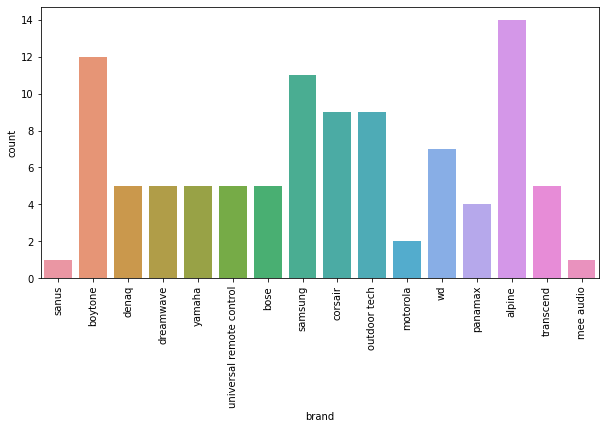

In [17]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x = df['brand'].head(100))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

The plot shows the popularity of each brand amongst the electronic store with alpine being highest amongst the bunch.

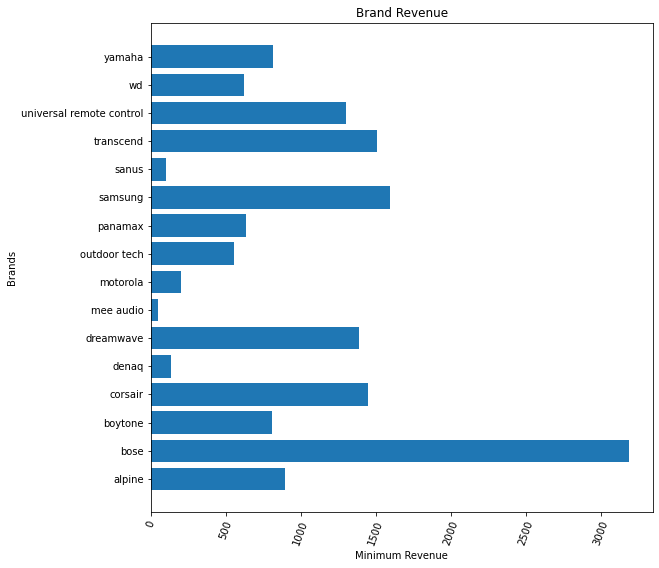

In [18]:
table = pd.pivot_table(data=df,index=df['brand'].head(100),values='prices.amountMin',aggfunc=np.sum)

plt.figure(figsize=(9,9))
#bar graph
plt.barh(table.index,table['prices.amountMin'])

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Minimum Revenue') 

#y-axis labels 
plt.ylabel('Brands') 

#plot title 
plt.title('Brand Revenue') 

#display 
plt.show();

The plot indicates the popularity of those brands based on price. Lower the price higher will be it's popularity.

<Figure size 1440x1080 with 0 Axes>

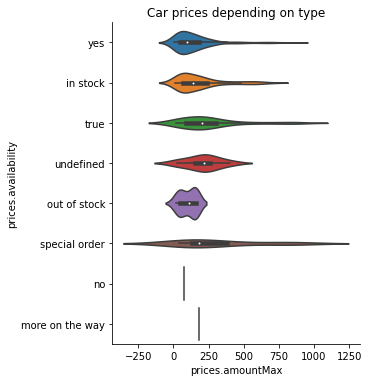

In [19]:
plt.figure(figsize=(20,15))
sns.catplot(x=df['prices.amountMax'].head(500), y=df['prices.availability'].head(500),kind="violin", data=df).set(title="Car prices depending on type")

The above violin plot indicates the availability of the prices for products and it's corresponding revenue. Special orders and genuine orders can be very expensive and go way beyond 1000 dollars

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Figure size 1440x1080 with 0 Axes>

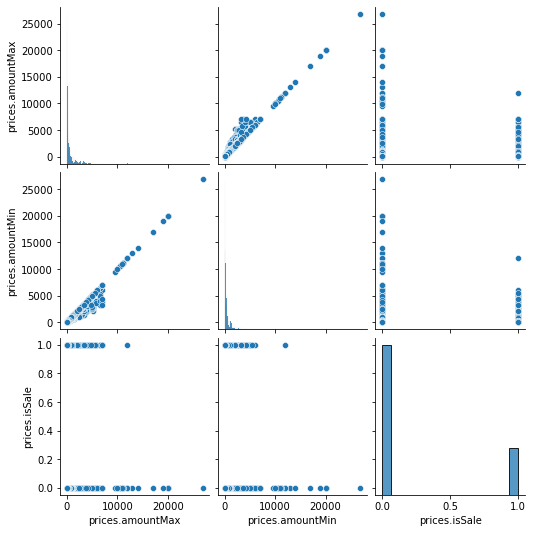

In [20]:
plt.figure(figsize=(20,15))
sns.pairplot(df)

The plot is hinting in the correlations of the numeric variables. The Maximum and minimum amounts have a linear correlation and also the prices which are on sale have the highest minimum value

### Handling non numeric features

##### Using ordinal encoding converted the non numeric features to numeric 

In [21]:
df_ord = df.copy()

In [22]:
from pandas.api.types import is_categorical_dtype, is_string_dtype, is_int64_dtype, is_float_dtype, is_bool_dtype

def df_string_to_cat(df):
    for col in df.columns:
        if is_string_dtype(df[col]):
            df[col] = df[col].astype('category').cat.as_ordered()
            

def df_cat_to_catcode(df):
    for col in df.columns:
        if is_categorical_dtype(df[col]):
            df[col] = df[col].cat.codes + 1
            
df_string_to_cat(df_ord)
df_cat_to_catcode(df_ord)

In [23]:
df_ord['prices.isSale'] = df_ord['prices.isSale'].astype(int)

In [24]:
data_info(df_ord)

,data type,percent missing,No. unique,unique values
primaryCategories,int8,0.0,6,"[4, 3, 5, 2, 1, 6]"
prices.availability,int8,0.0,17,"[17, 6, 15, 16, 11, 14, 10, 9, 13, 5, 12, 2, 3..."
prices.currency,int8,0.0,5,"[5, 1, 4, 2, 3]"
id,int16,0.0,1245,"[830, 689, 289, 546, 816, 836, 305, 1241, 180,..."
sourceURLs,int16,0.0,1192,"[776, 74, 276, 837, 202, 668, 703, 441, 827, 7..."
...,...,...,...,...
upc,int16,0.0,654,"[410, 316, 448, 384, 88, 321, 45, 550, 482, 57..."
weight,int16,0.0,805,"[538, 275, 136, 262, 173, 128, 131, 16, 487, 7..."
prices.isSale,int32,0.0,2,"[0, 1]"
prices.amountMin,float64,0.0,4907,"[104.99, 64.99, 69.0, 69.99, 66.99, 66.0, 74.9..."


### Initial Model

In [25]:
df = df_ord.copy()

In [26]:
X = df.drop('prices.isSale', axis=1)
y = df['prices.isSale']

In [27]:
def test(X,y):
    oob_scores = []

    for i in range(10):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
        rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True) 
        rf.fit(X_train, y_train)
        oob_scores.append(rf.oob_score_)
        oob = rf.oob_score_
        n = rfnnodes(rf)
        h = np.median(rfmaxdepths(rf))
        
    print("Out-of-bag scores: \n", oob_scores)
    print("Mean oob score: ", np.mean(oob_scores))
    print("")
    print(f"OOB R^2 is {np.mean(oob):.5f} using {np.mean(n)} tree nodes with {np.mean(h)} median tree depth")
    return rf,oob

In [28]:
def showimp(rf, X, y):
    features = list(X.columns)
    I = importances(rf, X, y, features=features)
    plt.figure(figsize=(15,15))
    plot_importances(I, color='#4575b4')

In [29]:
rf,mean_oob_baseline = test(X,y)

Out-of-bag scores: 
 [0.7821468345755161, 0.7787201233616037, 0.7811188212113425, 0.7832605157200377, 0.7801764756275165, 0.7849738713269939, 0.7802621434078643, 0.7823181701362117, 0.7820611667951683, 0.7783774522402125]
Mean oob score:  0.7813415574402468

OOB R^2 is 0.77838 using 417992.0 tree nodes with 33.0 median tree depth


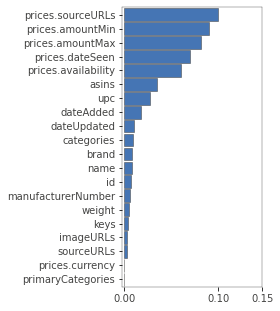

In [30]:
showimp(rf,X,y) #Shows which features have the at most importance in prediction

### Feature Engineering

###### Removing unimportant features

In [31]:
list1 = ['prices.currency','primaryCategories','name','imageURLs',
        'sourceURLs','keys','categories','brand']
df.drop(list1,axis=1, inplace=True)

###### Adding a new feature - discounted price

In [32]:
initial_price = df['prices.amountMax']
final_price = df['prices.amountMin']

df['prices.discount'] = ((initial_price-final_price)/(initial_price))*100

In [33]:
data_info(df)

,data type,percent missing,No. unique,unique values
prices.availability,int8,0.0,17,"[17, 6, 15, 16, 11, 14, 10, 9, 13, 5, 12, 2, 3..."
id,int16,0.0,1245,"[830, 689, 289, 546, 816, 836, 305, 1241, 180,..."
prices.dateSeen,int16,0.0,6984,"[608, 5398, 3086, 3691, 2708, 4374, 2328, 2261..."
prices.sourceURLs,int16,0.0,8520,"[928, 7150, 7149, 3732, 381, 382, 3878, 2976, ..."
asins,int16,0.0,1245,"[265, 706, 91, 522, 61, 298, 520, 393, 619, 53..."
...,...,...,...,...
weight,int16,0.0,805,"[538, 275, 136, 262, 173, 128, 131, 16, 487, 7..."
prices.isSale,int32,0.0,2,"[0, 1]"
prices.amountMax,float64,0.0,4697,"[104.99, 69.0, 69.99, 66.99, 66.0, 74.99, 65.9..."
prices.amountMin,float64,0.0,4907,"[104.99, 64.99, 69.0, 69.99, 66.99, 66.0, 74.9..."


### Final Model

In [34]:
X = df.drop('prices.isSale', axis=1)
y = df['prices.isSale']

In [35]:
rf,oob = test(X,y)

Out-of-bag scores: 
 [0.8295211171078557, 0.8268654159170736, 0.8254947314315086, 0.8300351237899426, 0.8265227447956823, 0.8256660669922042, 0.8254090636511608, 0.8313201404951598, 0.828493103743682, 0.829863788229247]
Mean oob score:  0.8279191296153516

OOB R^2 is 0.82986 using 317500.0 tree nodes with 31.0 median tree depth


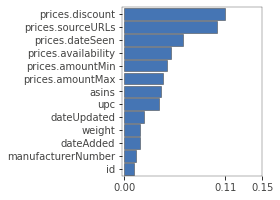

In [36]:
showimp(rf,X,y)

As we can see that the model is able to successfully and accurately predict whether a particular brand will go on sale or not. We are getting an accuracy of around 83% which increased from our initial accuracy of 78% after doing some feature engineering, indicating that there were some columns that were restricting the model prediction accuracy.